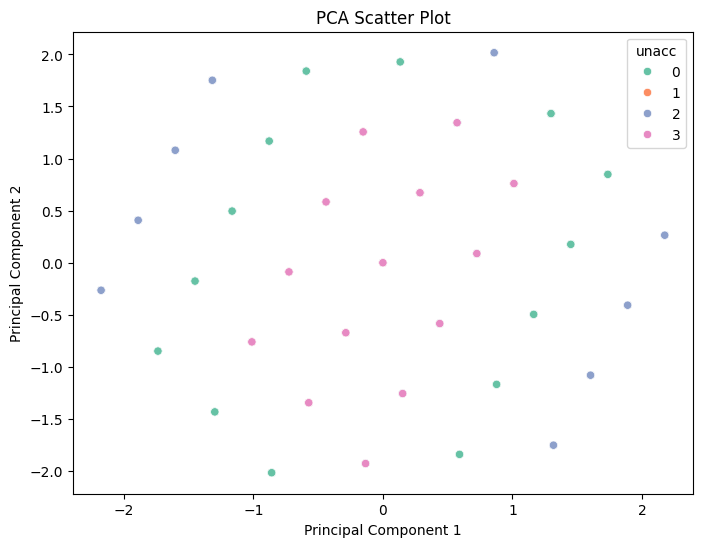

Accuracy before PCA: 0.96
Accuracy after PCA: 0.68


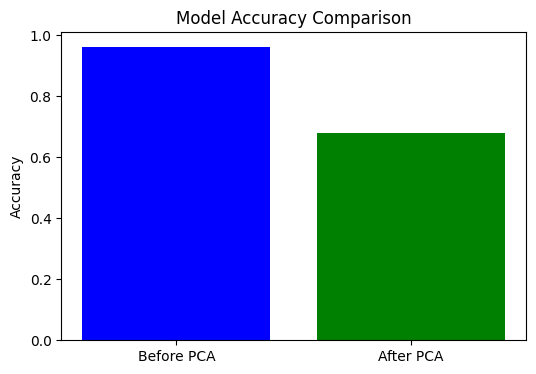

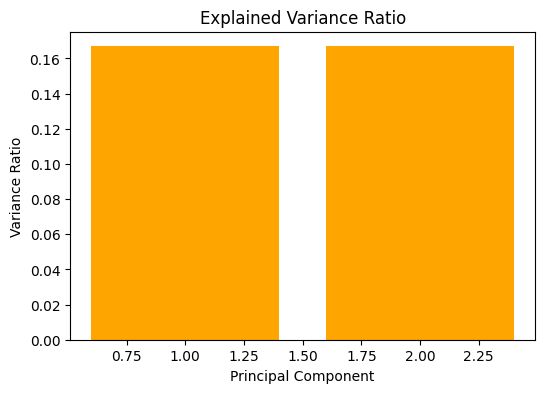

In [2]:
# PCA의 작동 원리를 이해하고, 차원 축소의 장점과 한계를 파악한다.
# 제공된 데이터셋을 PCA로 변환하고, 주성분 분석 결과를 시각화한다.
# PCA 적용 전후 랜덤포레스트(Random Forest) 모델의 성능을 비교하여 차원 축소가 예측 성능에 미친 영향을 파악한다.

# PCA (Principal Component Analysis)
# 고차원 데이터를 저차원으로 축소하여 중요한 정보를 유지하는 기법
# 데이터의 분산을 최대화하는 방향(주성분)을 찾고, 해당 축으로 데이터를 변환
# 장점: 데이터 시각화를 용이하게 함, 계산 효율성을 높이고 차원의 저주를 완화
# 단점: 주성분은 원래 데이터의 의미를 잃을 수 있음, 중요한 정보를 충분히 보존하지 못할 가능성 있음

# 필수 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
# 제공된 데이터셋(car_evaluation.csv)을 업로드하고 필요한 전처리를 수행
# 범주형 데이터를 인코딩하여 숫자로 변환
# PCA 적용을 위해 데이터를 정규화 (예: StandardScaler 사용)

data = pd.read_csv('car_evaluation.csv')

# 데이터 확인
# print(data.head())

# 범주형 데이터 인코딩
label_encoders = {} # 각 열에 대한 LabelEncoder 객체를 저장할 딕셔너리
for column in data.columns:
    if data[column].dtype == 'object': # 열의 데이터 타입이 문자열(범주형)인지 확인
        # 범주형 데이터를 숫자로 변환할 LabelEncoder 객체 생성
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column]) # 데이터를 숫자로 변환하여 덮어씀
        label_encoders[column] = le # 변환에 사용된 LabelEncoder 객체를 저장 (역변환에 사용 가능)

# 특징(X)와 레이블(y) 분리
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler() # 데이터의 평균을 0, 표준편차를 1로 변환하는 스케일러 객체 생성
X_scaled = scaler.fit_transform(X) # 특징 데이터를 정규화



# 2. PCA 적용
# PCA를 사용하여 데이터를 2차원 또는 3차원으로 축소
# 축소된 데이터를 산점도(Scatter Plot)로 시각화하여 데이터 분포를 확인

pca = PCA(n_components=2)  # PCA 객체 생성, 2개의 주성분으로 축소하도록 설정 - 2D 축소
X_pca = pca.fit_transform(X_scaled) # 정규화된 데이터를 사용해 주성분 분석 수행 및 변환

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2') # 주성분 1과 2를 사용한 산점도, 레이블(y)에 따라 색상 구분
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# 3. PCA 적용 전후 랜덤포레스트 모델 성능 비교
# PCA를 적용하기 전의 데이터를 사용하여 랜덤포레스트 모델을 학습하고 성능(정확도)을 평가
# PCA를 적용한 데이터를 사용하여 동일한 모델을 학습하고 성능을 평가

# 데이터 분할 (학습/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 (PCA 전)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred) # 예측 결과와 실제값 비교해 정확도 계산

# 랜덤포레스트 모델 (PCA 후)
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# 결과 비교
print(f"Accuracy before PCA: {accuracy_original:.2f}")
print(f"Accuracy after PCA: {accuracy_pca:.2f}")


# PCA 전후 정확도를 막대그래프로 표현
# 모델 성능 비교 시각화
plt.figure(figsize=(6, 4))
plt.bar(['Before PCA', 'After PCA'], [accuracy_original, accuracy_pca], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# 주성분 기여도 분석
explained_variance_ratio = pca.explained_variance_ratio_ # 각 주성분의 분산 기여율 계산

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='orange')
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()


**주성분 분석(PCA)**를 통해 데이터를 2차원으로 축소하여 산점도로 시각화한 결과
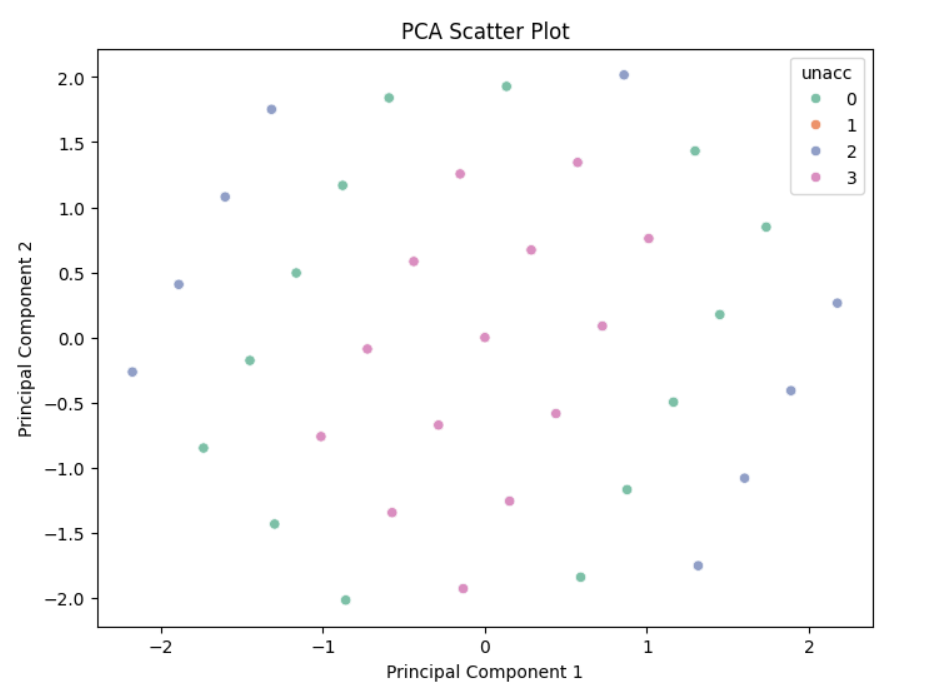

각 점은 데이터 포인트를 나타내며, 색상은 레이블(클래스)을 나타냄.

PCA로 데이터의 차원을 줄였지만, 서로 다른 클래스가 명확히 분리되지 않고 상당히 겹쳐 있는 것이 관찰

-> 이는 PCA가 단순히 데이터의 분산을 최대화하는 축을 기반으로 차원을 줄이기 때문에, 원래의 데이터 구조에서 중요한 정보를 충분히 반영하지 못할 수 있음을 보여줌

**PCA 적용 전후 모델의 정확도 비교**를 나타낸 그래프
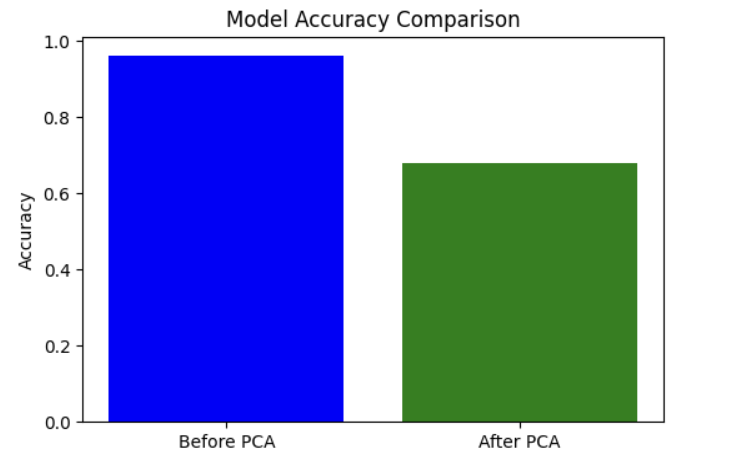

PCA 적용 전(Random Forest 모델 정확도): 96%

PCA 적용 후(Random Forest 모델 정확도): 68%

-> PCA는 차원을 축소하며 일부 정보를 제거하는데 이 과정에서 모델이 분류에 중요한 정보를 잃었을 가능성

-> PCA는 클래스 간 분리를 극대화하지 않고, 전체 데이터의 분산을 기준으로 차원을 축소하는데, 따라서 랜덤포레스트 모델이 분류에 필요한 특징을 충분히 반영하지 못하게 됨.

<**주성분 기여도 분석**> 각 주성분이 데이터 분산에 기여한 비율(Explained Variance Ratio)을 막대그래프로 시각화
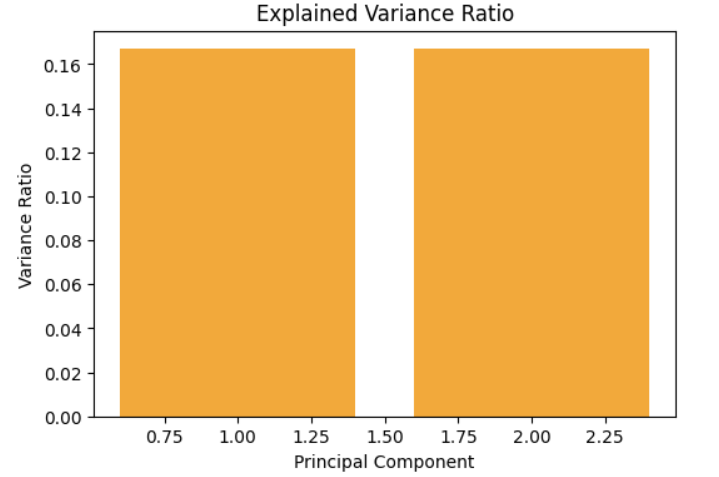

첫 번째 주성분과 두 번째 주성분 각각 약 **16%**의 분산을 설명하고 있음.

-> 이 두 주성분이 전체 데이터 분산의 약 32%만을 설명하므로, 대부분의 중요한 정보가 삭제된 것을 알 수 있음.

PCA를 적용하면 차원을 줄일 수 있어

데이터 처리 속도를 높이고 시각화가 가능하다는 장점이 있지만,

모델 성능에는 부정적인 영향을 미쳤습니다.

-> 이는 PCA가 분산을 기준으로 차원을 축소하기 때문에

랜덤포레스트가 의존하는 중요한 특징 정보를 잃어버렸기 때문입니다.

* PCA 대신 **LDA(Linear Discriminant Analysis)**와 같은 분류 작업에 특화된 차원 축소 방법을 고려할 수 있습니다. LDA는 클래스 간 분리를 극대화
* 만약 PCA를 사용해야 한다면, 주성분 개수를 늘려 더 많은 정보를 보존할 수 있습니다.
* PCA는 주로 시각화나 데이터 압축에 적합하며, 반드시 성능 향상을 보장하지 않습니다.